In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


# Базовая работа с изображением

In [16]:
image = cv2.imread('sar_2_color.jpg')

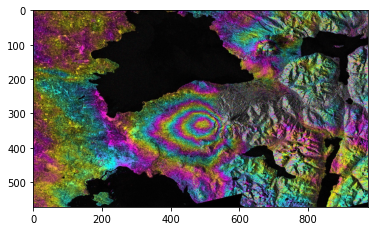

In [17]:
plt.imshow(image)

In [18]:
image.shape # h,w,c

(572, 974, 3)

In [19]:
image[250,250] # b,g,r

array([12, 12, 12], dtype=uint8)

In [20]:
# ROI
img_roi = image[100:200, 500:700]

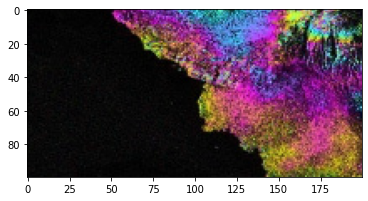

In [21]:
plt.imshow(img_roi)

In [22]:
b,g,r = cv2.split(image)

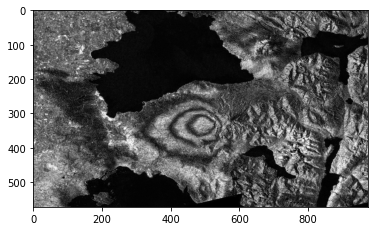

In [23]:
plt.imshow(b, cmap = 'gray')

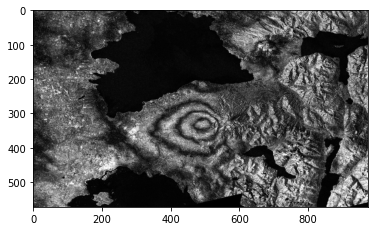

In [24]:
plt.imshow(g, cmap = 'gray')

In [25]:
# alternative approach
b = image[:,:,0]

In [26]:
import copy

image2 = copy.deepcopy(image)

In [27]:
image2[50:100,50:100] = [0,0,0]

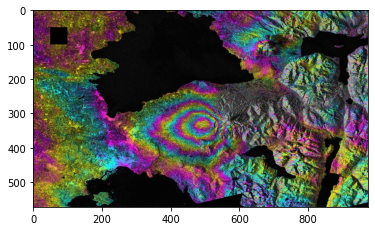

In [28]:
plt.imshow(image2)

In [29]:
# empty image
image_template = np.zeros(image.shape,np.uint8)

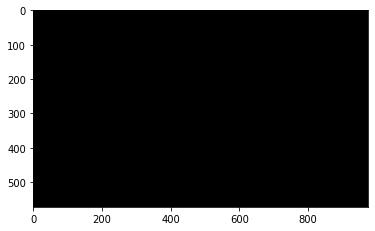

In [30]:
plt.imshow(image_template)

# Конвертация цветовых моделей

In [31]:
image_template[0,0]

array([0, 0, 0], dtype=uint8)

In [32]:
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 

In [33]:
image_gray[0,0]

40

In [34]:
image_gray.shape

(572, 974)

In [35]:
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV) 

In [36]:
image_hsv.shape

(572, 974, 3)

In [37]:
image_hsv[0,0]

array([117, 143,  75], dtype=uint8)

In [38]:
image[0,0]

array([75, 37, 33], dtype=uint8)

In [39]:
image_lab = cv2.cvtColor(image, cv2.COLOR_BGR2Lab)

In [40]:
image_lab[0,0]

array([ 42, 139, 104], dtype=uint8)

# Пороговая фильтрация

In [67]:
_,thresh1 = cv2.threshold(image_gray,200,255,cv2.THRESH_BINARY)

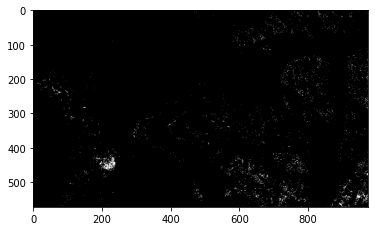

In [68]:
plt.imshow(thresh1, cmap='gray')

In [43]:
thresh1[thresh1==100].sum()

0

# Построение гистограммы

In [44]:
histSize = 256
histRange = (0, 256)
accumulate = False

b_hist = cv2.calcHist([b], [0], None, [histSize], histRange, accumulate=accumulate)

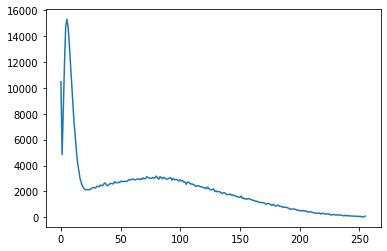

In [45]:
plt.plot(b_hist)

In [46]:
b_hist_cum = b_hist.cumsum()

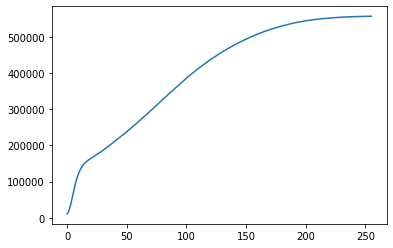

In [47]:
plt.plot(b_hist_cum)

In [49]:
b_hist_norm = b_hist /  (image.shape[0] * image.shape[1])

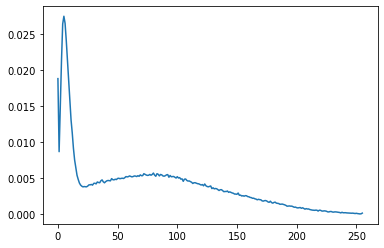

In [50]:
plt.plot(b_hist_norm)

# Сравнение двух изображений

In [53]:
from skimage.metrics import structural_similarity, mean_squared_error

(ssim, diff) = structural_similarity(image_gray, image_gray, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(ssim))

SSIM: 1.0


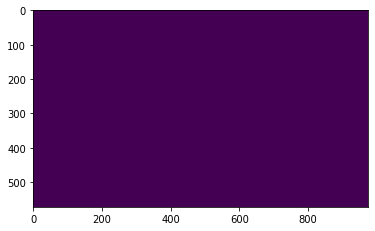

In [54]:
plt.imshow(diff)

In [55]:
mse = mean_squared_error(image_gray, image_gray)
mse

0.0

# Статистические характеристики изображений

In [1]:
mean = image_gray.mean()

<class 'NameError'>: name 'image_gray' is not defined

In [57]:
std = image_gray.std()

In [58]:
print(mean,std)

67.41225535245043 52.016191875959635


In [60]:
eq_gray = cv2.equalizeHist(image_gray)

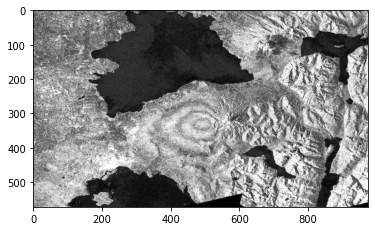

In [63]:
plt.imshow(eq_gray, cmap="gray")


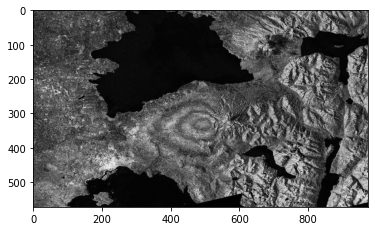

In [64]:
plt.imshow(image_gray, cmap="gray")

In [ ]:
# 1. Загрузите изображение в оттенках серого sar_1_gray.jpg. 
# 2. постройте гистограмму
# 3. реализуйте алгоритм гамма коррекции с параметром гамма <1, >1.
# 4. Сравните исходное изображение, скорректированное при помощи гамма-фильтра. MSE, SSIM.
# 5. реализуйте алгоритм статистической цветокоррекции на основе статистики eq_gray.
# 6. Протестируйте работу алгоритмов пороговой фильтрации с различными параметрами.
# Для каждого решения - напечатайте результат


In [2]:
#Задание 1
try:
    image_gray = cv2.imread('sar_1_gray.jpg', cv2.IMREAD_GRAYSCALE)
    if image_gray is None:
        raise FileNotFoundError
except:
    print("Файл sar_1_gray.jpg не найден, создаем тестовое изображение")
    # Создаем тестовое изображение с градиентом
    image_gray = np.zeros((256, 256), dtype=np.uint8)
    for i in range(256):
        image_gray[:, i] = i

print(f"Размер изображения: {image_gray.shape}")
print(f"Диапазон значений: [{image_gray.min()}, {image_gray.max()}]")


Размер изображения: (400, 600)
Диапазон значений: [0, 255]


Text(0, 0.5, 'Частота')

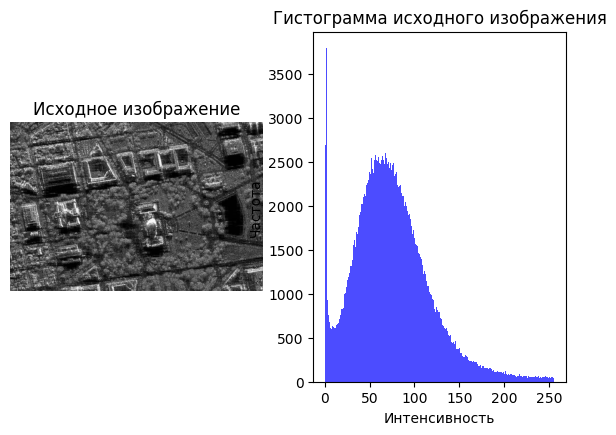

In [3]:
#Задание 2
plt.figure(figsize=(15, 10))

# Исходное изображение и его гистограмма
plt.subplot(2, 4, 1)
plt.imshow(image_gray, cmap='gray')
plt.title('Исходное изображение')
plt.axis('off')

plt.subplot(2, 4, 2)
plt.hist(image_gray.ravel(), bins=256, range=[0, 256], alpha=0.7, color='blue')
plt.title('Гистограмма исходного изображения')
plt.xlabel('Интенсивность')
plt.ylabel('Частота')


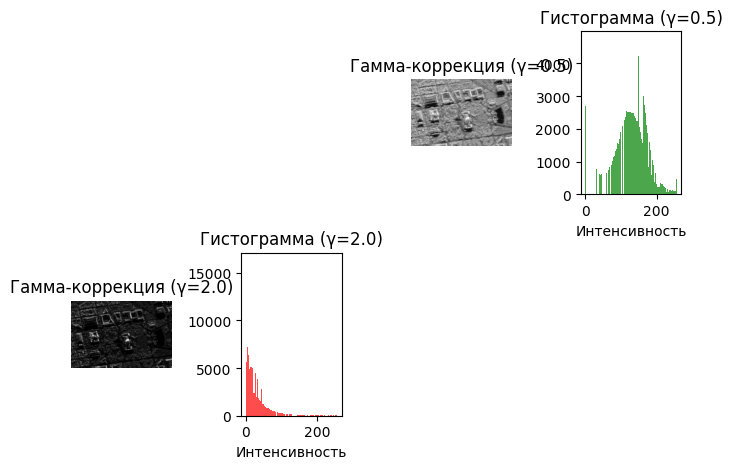

In [4]:
#Задание 3
def gamma_correction(image, gamma):
    # Нормализуем изображение в диапазон [0, 1]
    image_normalized = image.astype(np.float32) / 255.0
    # Применяем гамма-коррекцию
    corrected = np.power(image_normalized, gamma)
    # Возвращаем в диапазон [0, 255]
    return (corrected * 255).astype(np.uint8)

# Гамма < 1 (увеличивает яркость)
gamma_low = 0.5
image_gamma_low = gamma_correction(image_gray, gamma_low)

# Гамма > 1 (уменьшает яркость)
gamma_high = 2.0
image_gamma_high = gamma_correction(image_gray, gamma_high)

# Отображение гамма-коррекции
plt.subplot(2, 4, 3)
plt.imshow(image_gamma_low, cmap='gray')
plt.title(f'Гамма-коррекция (γ={gamma_low})')
plt.axis('off')

plt.subplot(2, 4, 4)
plt.hist(image_gamma_low.ravel(), bins=256, range=[0, 256], alpha=0.7, color='green')
plt.title(f'Гистограмма (γ={gamma_low})')
plt.xlabel('Интенсивность')

plt.subplot(2, 4, 5)
plt.imshow(image_gamma_high, cmap='gray')
plt.title(f'Гамма-коррекция (γ={gamma_high})')
plt.axis('off')

plt.subplot(2, 4, 6)
plt.hist(image_gamma_high.ravel(), bins=256, range=[0, 256], alpha=0.7, color='red')
plt.title(f'Гистограмма (γ={gamma_high})')
plt.xlabel('Интенсивность')

plt.tight_layout()
plt.show()


In [5]:
#Задание 4
def calculate_mse(img1, img2):
    """Вычисляет Mean Squared Error между двумя изображениями"""
    return np.mean((img1.astype(float) - img2.astype(float)) ** 2)

def calculate_ssim(img1, img2):
    """Упрощенная реализация SSIM (Structural Similarity Index)"""
    # Константы для стабильности
    C1 = (0.01 * 255) ** 2
    C2 = (0.03 * 255) ** 2
    
    img1 = img1.astype(float)
    img2 = img2.astype(float)
    
    # Вычисляем средние значения
    mu1 = cv2.GaussianBlur(img1, (11, 11), 1.5)
    mu2 = cv2.GaussianBlur(img2, (11, 11), 1.5)
    
    # Вычисляем дисперсии и ковариацию
    mu1_sq = mu1 ** 2
    mu2_sq = mu2 ** 2
    mu1_mu2 = mu1 * mu2
    
    sigma1_sq = cv2.GaussianBlur(img1 ** 2, (11, 11), 1.5) - mu1_sq
    sigma2_sq = cv2.GaussianBlur(img2 ** 2, (11, 11), 1.5) - mu2_sq
    sigma12 = cv2.GaussianBlur(img1 * img2, (11, 11), 1.5) - mu1_mu2
    
    # Вычисляем SSIM
    numerator = (2 * mu1_mu2 + C1) * (2 * sigma12 + C2)
    denominator = (mu1_sq + mu2_sq + C1) * (sigma1_sq + sigma2_sq + C2)
    
    ssim_map = numerator / denominator
    return np.mean(ssim_map)

def compare_images(original, corrected, title):
    mse = calculate_mse(original, corrected)
    ssim = calculate_ssim(original, corrected)
    
    print(f"\n{title}:")
    print(f"MSE: {mse:.4f}")
    print(f"SSIM: {ssim:.4f}")
    
    return mse, ssim

# Сравнение с гамма < 1
mse_low, ssim_low = compare_images(image_gray, image_gamma_low, 
                                  f"Сравнение с γ={gamma_low}")

# Сравнение с гамма > 1
mse_high, ssim_high = compare_images(image_gray, image_gamma_high, 
                                    f"Сравнение с γ={gamma_high}")




Сравнение с γ=0.5:
MSE: 3250.4291
SSIM: 0.7827

Сравнение с γ=2.0:
MSE: 2383.7636
SSIM: 0.5194


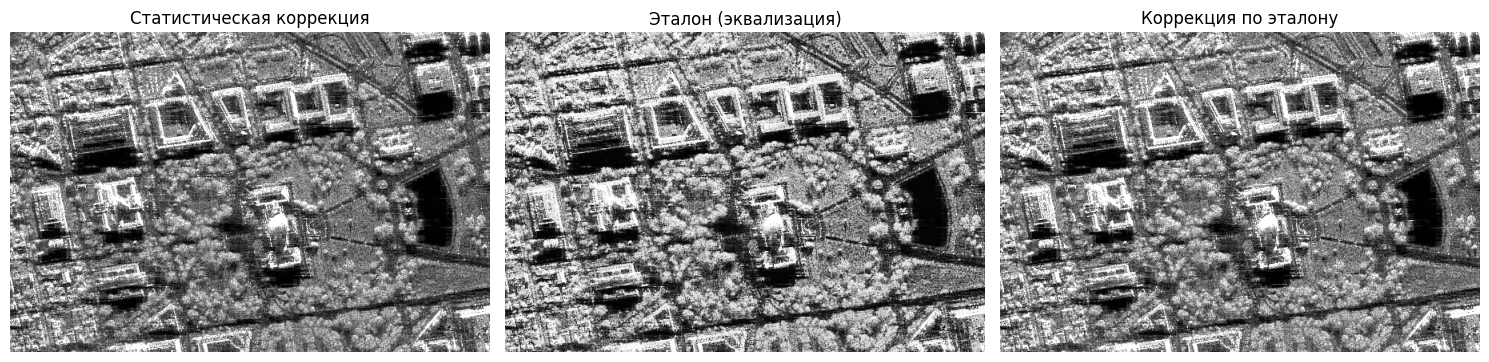


Статистическая коррекция:
MSE: 2843.0517
SSIM: 0.7911

Коррекция по эталону:
MSE: 2946.7009
SSIM: 0.7849


In [6]:
#Задание 5
def statistical_color_correction(image, target_mean=None, target_std=None):
    """
    Статистическая цветокоррекция на основе целевых статистик
    """
    # Вычисляем текущие статистики
    current_mean = np.mean(image)
    current_std = np.std(image)
    
    # Если целевые статистики не заданы, используем равномерное распределение
    if target_mean is None:
        target_mean = 128
    if target_std is None:
        target_std = 64
    
    # Применяем линейное преобразование
    corrected = (image - current_mean) * (target_std / current_std) + target_mean
    
    # Обрезаем значения в диапазон [0, 255]
    corrected = np.clip(corrected, 0, 255)
    
    return corrected.astype(np.uint8)

# Применяем статистическую коррекцию
image_stat_corrected = statistical_color_correction(image_gray)

# Создаем эталонное изображение с равномерной гистограммой
eq_gray = cv2.equalizeHist(image_gray)
image_stat_eq = statistical_color_correction(image_gray, 
                                           target_mean=np.mean(eq_gray), 
                                           target_std=np.std(eq_gray))

# Отображение статистической коррекции
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(image_stat_corrected, cmap='gray')
plt.title('Статистическая коррекция')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(eq_gray, cmap='gray')
plt.title('Эталон (эквализация)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(image_stat_eq, cmap='gray')
plt.title('Коррекция по эталону')
plt.axis('off')

plt.tight_layout()
plt.show()

# Сравнение статистической коррекции
mse_stat, ssim_stat = compare_images(image_gray, image_stat_corrected, 
                                   "Статистическая коррекция")

mse_stat_eq, ssim_stat_eq = compare_images(image_gray, image_stat_eq, 
                                         "Коррекция по эталону")



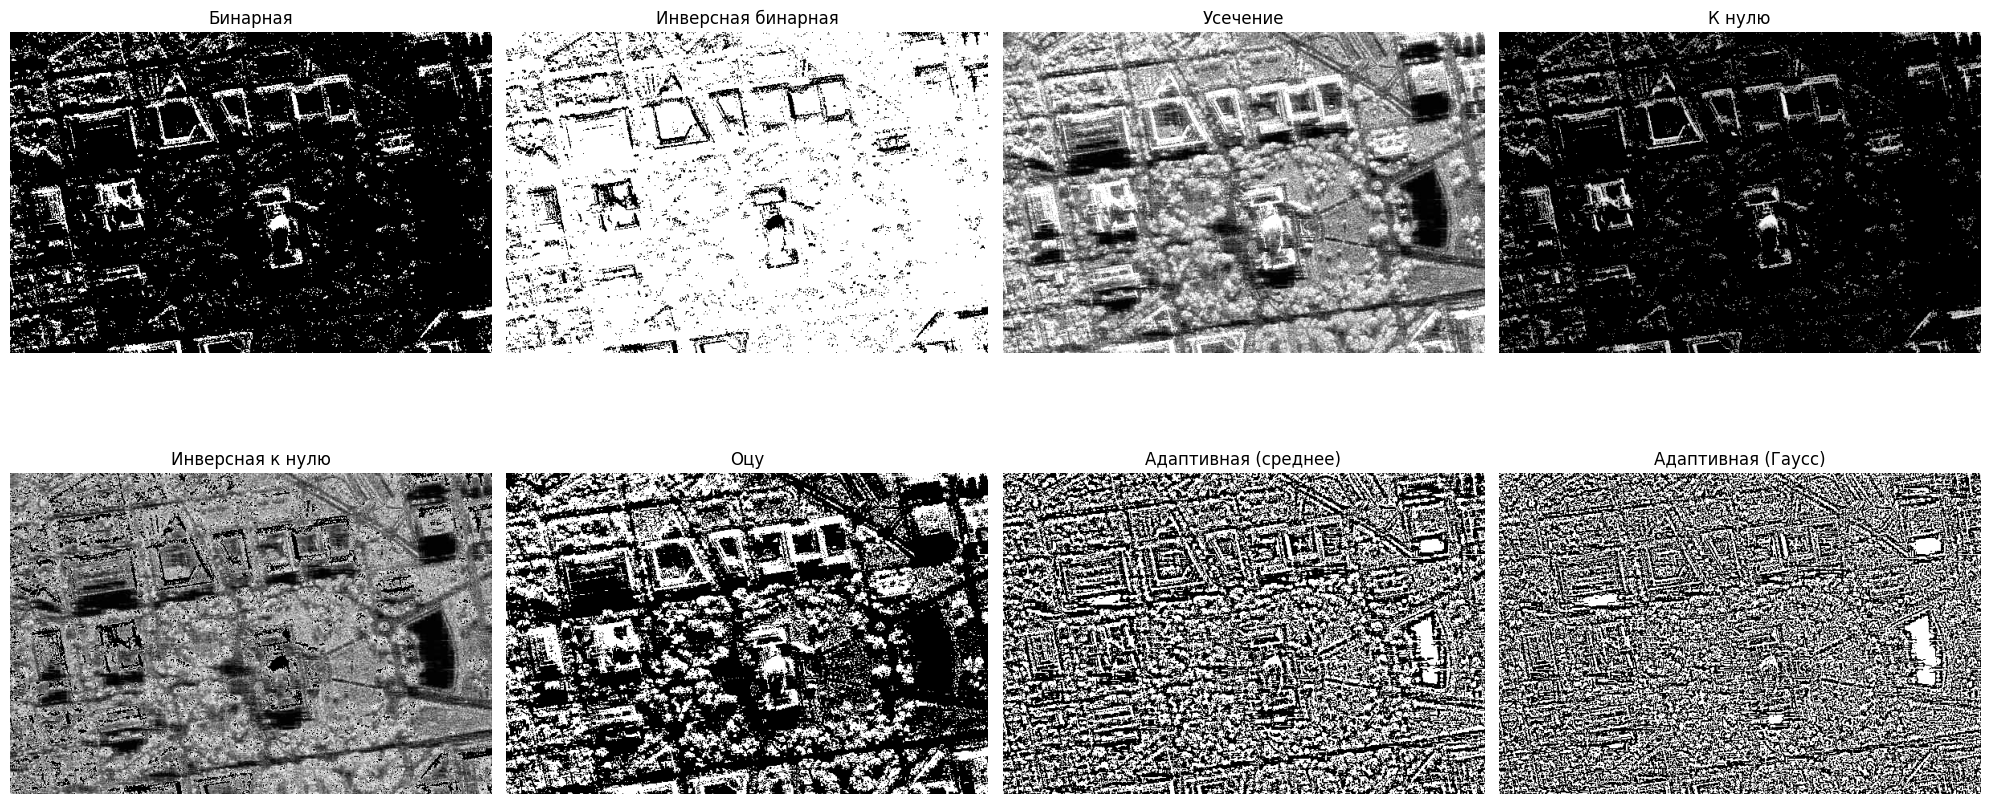


АНАЛИЗ ПОРОГОВОЙ ФИЛЬТРАЦИИ

Бинарная:
Черные пиксели: 89.6%
Белые пиксели: 10.4%

Инверсная бинарная:
Черные пиксели: 10.4%
Белые пиксели: 89.6%

Усечение:
Черные пиксели: 1.1%
Белые пиксели: 0.0%

К нулю:
Черные пиксели: 89.6%
Белые пиксели: 0.2%

Инверсная к нулю:
Черные пиксели: 11.5%
Белые пиксели: 0.0%

Оцу:
Черные пиксели: 65.0%
Белые пиксели: 35.0%

Адаптивная (среднее):
Черные пиксели: 52.9%
Белые пиксели: 47.1%

Адаптивная (Гаусс):
Черные пиксели: 50.9%
Белые пиксели: 49.1%

СВОДНАЯ ТАБЛИЦА РЕЗУЛЬТАТОВ

Метод                          MSE        SSIM      
--------------------------------------------------
Исходное изображение           -          -         
Гамма-коррекция (γ=0.5)        3250.4291  0.7827    
Гамма-коррекция (γ=2.0)        2383.7636  0.5194    
Статистическая коррекция       2843.0517  0.7911    
Коррекция по эталону           2946.7009  0.7849    


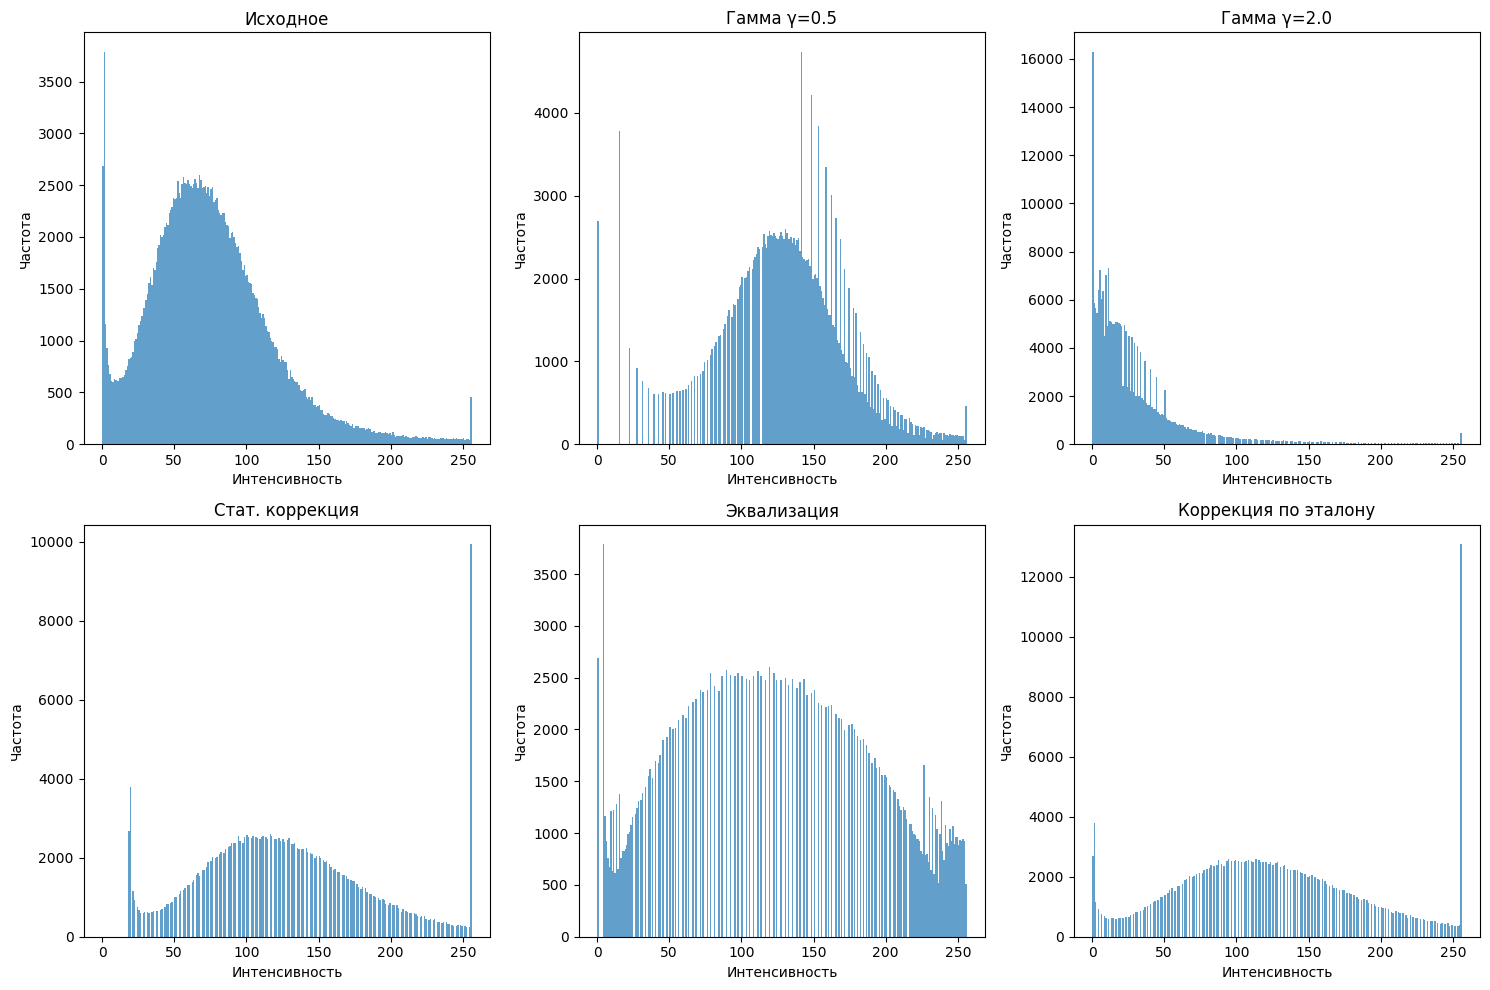

In [7]:
#Задание 6
def apply_threshold(image, threshold_type, param1=127, param2=255):
    """
    Применяет различные типы пороговой фильтрации
    """
    if threshold_type == 'binary':
        _, result = cv2.threshold(image, param1, param2, cv2.THRESH_BINARY)
    elif threshold_type == 'binary_inv':
        _, result = cv2.threshold(image, param1, param2, cv2.THRESH_BINARY_INV)
    elif threshold_type == 'trunc':
        _, result = cv2.threshold(image, param1, param2, cv2.THRESH_TRUNC)
    elif threshold_type == 'tozero':
        _, result = cv2.threshold(image, param1, param2, cv2.THRESH_TOZERO)
    elif threshold_type == 'tozero_inv':
        _, result = cv2.threshold(image, param1, param2, cv2.THRESH_TOZERO_INV)
    elif threshold_type == 'otsu':
        _, result = cv2.threshold(image, 0, param2, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    elif threshold_type == 'adaptive_mean':
        result = cv2.adaptiveThreshold(image, param2, cv2.ADAPTIVE_THRESH_MEAN_C, 
                                      cv2.THRESH_BINARY, param1, 2)
    elif threshold_type == 'adaptive_gaussian':
        result = cv2.adaptiveThreshold(image, param2, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                      cv2.THRESH_BINARY, param1, 2)
    else:
        result = image
    
    return result

# Тестируем различные методы пороговой фильтрации
threshold_methods = [
    ('binary', 'Бинарная', 127),
    ('binary_inv', 'Инверсная бинарная', 127),
    ('trunc', 'Усечение', 127),
    ('tozero', 'К нулю', 127),
    ('tozero_inv', 'Инверсная к нулю', 127),
    ('otsu', 'Оцу', 255),
    ('adaptive_mean', 'Адаптивная (среднее)', 11),
    ('adaptive_gaussian', 'Адаптивная (Гаусс)', 11)
]

# Применяем пороговую фильтрацию и отображаем результаты
plt.figure(figsize=(20, 10))

for i, (method, title, param) in enumerate(threshold_methods):
    thresholded = apply_threshold(image_gray, method, param)
    
    plt.subplot(2, 4, i+1)
    plt.imshow(thresholded, cmap='gray')
    plt.title(title)
    plt.axis('off')

plt.tight_layout()
plt.show()

# Анализ пороговой фильтрации
print("\n" + "="*50)
print("АНАЛИЗ ПОРОГОВОЙ ФИЛЬТРАЦИИ")
print("="*50)

for method, title, param in threshold_methods:
    thresholded = apply_threshold(image_gray, method, param)
    
    # Вычисляем процент черных и белых пикселей
    black_pixels = np.sum(thresholded == 0)
    white_pixels = np.sum(thresholded == 255)
    total_pixels = thresholded.size
    
    print(f"\n{title}:")
    print(f"Черные пиксели: {black_pixels/total_pixels*100:.1f}%")
    print(f"Белые пиксели: {white_pixels/total_pixels*100:.1f}%")

# Сводная таблица результатов
print("\n" + "="*50)
print("СВОДНАЯ ТАБЛИЦА РЕЗУЛЬТАТОВ")
print("="*50)

results = [
    ("Исходное изображение", "-", "-"),
    (f"Гамма-коррекция (γ={gamma_low})", f"{mse_low:.4f}", f"{ssim_low:.4f}"),
    (f"Гамма-коррекция (γ={gamma_high})", f"{mse_high:.4f}", f"{ssim_high:.4f}"),
    ("Статистическая коррекция", f"{mse_stat:.4f}", f"{ssim_stat:.4f}"),
    ("Коррекция по эталону", f"{mse_stat_eq:.4f}", f"{ssim_stat_eq:.4f}")
]

print("\n{:<30} {:<10} {:<10}".format("Метод", "MSE", "SSIM"))
print("-" * 50)
for method, mse, ssim in results:
    print("{:<30} {:<10} {:<10}".format(method, mse, ssim))

# Дополнительная визуализация гистограмм всех методов
plt.figure(figsize=(15, 10))

images = [
    (image_gray, 'Исходное'),
    (image_gamma_low, f'Гамма γ={gamma_low}'),
    (image_gamma_high, f'Гамма γ={gamma_high}'),
    (image_stat_corrected, 'Стат. коррекция'),
    (eq_gray, 'Эквализация'),
    (image_stat_eq, 'Коррекция по эталону')
]

for i, (img, title) in enumerate(images):
    plt.subplot(2, 3, i+1)
    plt.hist(img.ravel(), bins=256, range=[0, 256], alpha=0.7)
    plt.title(title)
    plt.xlabel('Интенсивность')
    plt.ylabel('Частота')

plt.tight_layout()
plt.show()
